# Crowdfunding Success in Turkey
https://archive.ics.uci.edu/dataset/1025/turkish+crowdfunding+startups

I selected this dataset because it has a moderate number of features and samples. It includes some foreign language text which should present some unique challenges. The dataset is fundamentally a classification task: which crowdfunding projects will succeed. I will explore unsupervised methods like clustering to assess how some projects might be improved.

## Data Cleaning
The original file is in Turkish. I did not attempt to translate the text description column, but did implement translations for all other columns. Given the scope of the issue, I implemented this step of data cleaning in a seperate file.

In [1]:
import pandas as pd

df = pd.read_csv("turkishCF.csv", sep=";")
print("Before translations:")
df.head()

Before translations:


,id,platform_adi,kitle_fonlamasi_turu,kategori,fon_sekli,proje_adi,proje_sahibi,proje_sahibi_cinsiyet,kac_proje_destekledi,kac_projeye_abone,...,sosyal_medya,sm_sayisi,sm_takipci,etiket_sayisi,icerik_kelime_sayisi,proje_aciklamasi,hedef_miktari,toplanan_tutar,destek_orani,basari_durumu
0,1,fongogo,ödül,diğer,ya hep ya hiç,Gerçek Gizlidir Filmleri,Lob Ekibi,belirsiz,1,0,...,var,3,274,0,301,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,136%,başarılı
1,2,fongogo,ödül,diğer,ya hep ya hiç,Fongogo - Hayat Bulsun!,Fongogo Team,belirsiz,3,0,...,var,3,5634,0,167,"Fongogo ekibi olarak büyümek, daha geniş kitle...",50000,50110,100%,başarılı
2,3,fongogo,ödül,diğer,ya hep ya hiç,"PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...",SİNEM CAN,kadın,0,0,...,var,2,510,4,413,Çocuklara her şeyin ücretsiz olduğu iyilik evi...,47000,47850,101%,başarılı
3,4,fongogo,ödül,diğer,ya hep ya hiç,Türk Kadının 100.yıl Seyri,Deniz Tutkusu Seyirde,kadın,0,0,...,var,2,3338,5,287,‘Sözde değil Özde İzindeyiz ‘ sloganıyla Atatü...,35000,35450,101%,başarılı
4,5,fongogo,ödül,diğer,ya hep ya hiç,Doğadaki Çocuk,Seren Kutadgu,kadın,2,0,...,var,1,144,3,571,İstanbul'daki çocuk yuvalarında yaşayan dezava...,30000,31250,104%,başarılı


In [2]:
print("After translations:")
df = pd.read_csv("translated_data.csv", sep=";")

df.head()

After translations:


,id,platform,crowdfunding_type,project_category,funding_method,project_name,project_owner_name,project_owner_gender,project_owner_n_backed,project_owner_n_subscribed,...,has_social,n_social,n_followers,n_tags,description_wordcount,description,funding_target,funding_collected,percent_collected,success
0,1,fongogo,reward,other,all or nothing,Gerçek Gizlidir Filmleri,Lob Ekibi,indeterminate,1,0,...,yes,3,274,0,301,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,136.0,1
1,2,fongogo,reward,other,all or nothing,Fongogo - Hayat Bulsun!,Fongogo Team,indeterminate,3,0,...,yes,3,5634,0,167,"Fongogo ekibi olarak büyümek, daha geniş kitle...",50000,50110,100.0,1
2,3,fongogo,reward,other,all or nothing,"PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...",SİNEM CAN,woman,0,0,...,yes,2,510,4,413,Çocuklara her şeyin ücretsiz olduğu iyilik evi...,47000,47850,101.0,1
3,4,fongogo,reward,other,all or nothing,Türk Kadının 100.yıl Seyri,Deniz Tutkusu Seyirde,woman,0,0,...,yes,2,3338,5,287,‘Sözde değil Özde İzindeyiz ‘ sloganıyla Atatü...,35000,35450,101.0,1
4,5,fongogo,reward,other,all or nothing,Doğadaki Çocuk,Seren Kutadgu,woman,2,0,...,yes,1,144,3,571,İstanbul'daki çocuk yuvalarında yaşayan dezava...,30000,31250,104.0,1


### The FAQ column appears to be nonsense or misattributed
Drop it

In [3]:
# unique values in a column has_faq
print(df["has_faq"].unique())
df=df.drop(columns=["has_faq"])

[nan]


# EDA
## Balance
What is the balance of the dataset based on success and some of the categorical features?

In [4]:
print(df["success"].value_counts())

success
0    1252
1     376
Name: count, dtype: int64


# Highly Unbalanced
We will sample the data to have even sizes of the success and failed targets

In [5]:

# sample the data for same number of successfull and unsuccessfull projects
df = pd.concat(
    [
        df[df["success"] == 0].sample(300, random_state=42),
        df[df["success"] == 1].sample(300, random_state=42),
    ]
)


### Missing Data
One sample is missing a region, drop the sample

Many samples are missing start and end dates, drop the columns

In [6]:
print(f"Before removing missing values: {df.shape}")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

df = df.drop(columns=["start_date", "end_date"])
df = df.dropna()

print(f"\nAfter removing missing values: {df.shape}")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

Before removing missing values: (600, 37)
start_date    193
end_date      171
dtype: int64

After removing missing values: (600, 35)
Series([], dtype: int64)


## EDA: Basic Stats

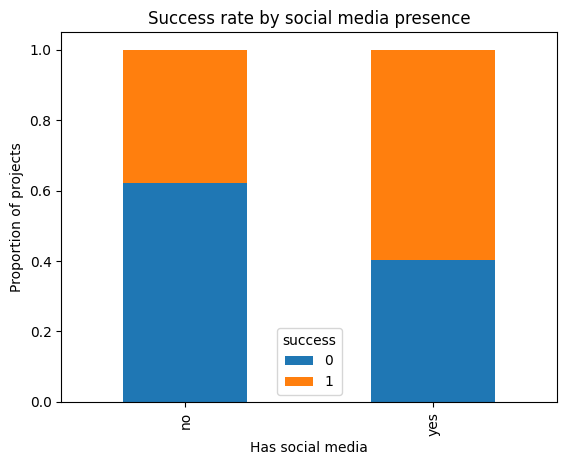

In [7]:
import matplotlib.pyplot as plt
# Compare the success rate of projects with and without social media presence
social_summary = df.groupby("has_social")["success"].value_counts(normalize=True).unstack()
social_summary.plot(kind="bar", stacked=True)
plt.xlabel("Has social media")
plt.ylabel("Proportion of projects")
plt.title("Success rate by social media presence")
plt.show()

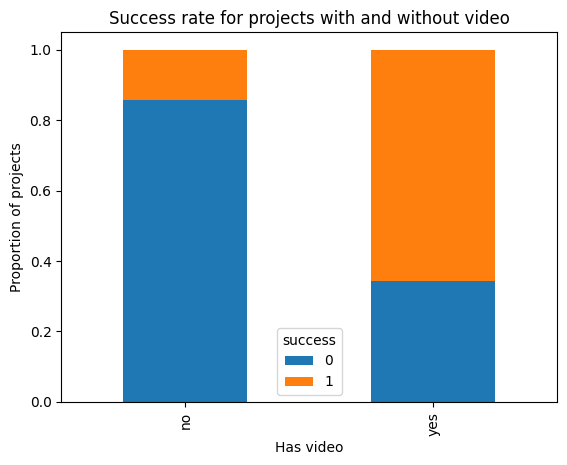

In [8]:
import matplotlib.pyplot as plt
# Compare the success rate of projects with and without social media presence
video_summary = df.groupby("has_video")["success"].value_counts(normalize=True).unstack()
video_summary.plot(kind="bar", stacked=True)
plt.xlabel("Has video")
plt.ylabel("Proportion of projects")
plt.title("Success rate for projects with and without video")
plt.show()

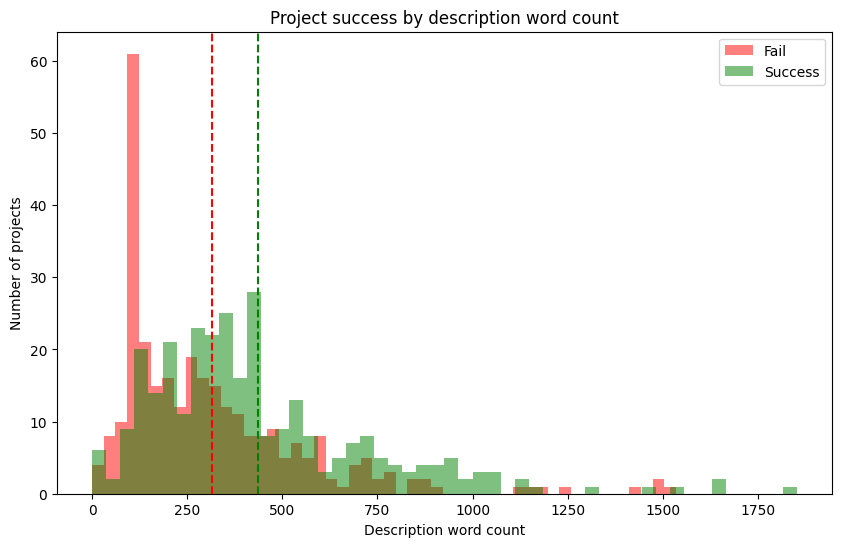

In [9]:
import matplotlib.pyplot as plt
# Compare the success rate of projects with their description_wordcount in the column
# two lines, red and green for fail and success
plt.figure(figsize=(10, 6))
plt.hist(df[df["success"] == 0]["description_wordcount"], bins=50, alpha=0.5, color="red", label="Fail")
plt.hist(df[df["success"] == 1]["description_wordcount"], bins=50, alpha=0.5, color="green", label="Success")
# add a vertical line to show the mean for each group
plt.axvline(df[df["success"] == 0]["description_wordcount"].mean(), color="red", linestyle="--")
plt.axvline(df[df["success"] == 1]["description_wordcount"].mean(), color="green", linestyle="--")
plt.xlabel("Description word count")
plt.ylabel("Number of projects")
plt.legend()
plt.title("Project success by description word count")
plt.show()



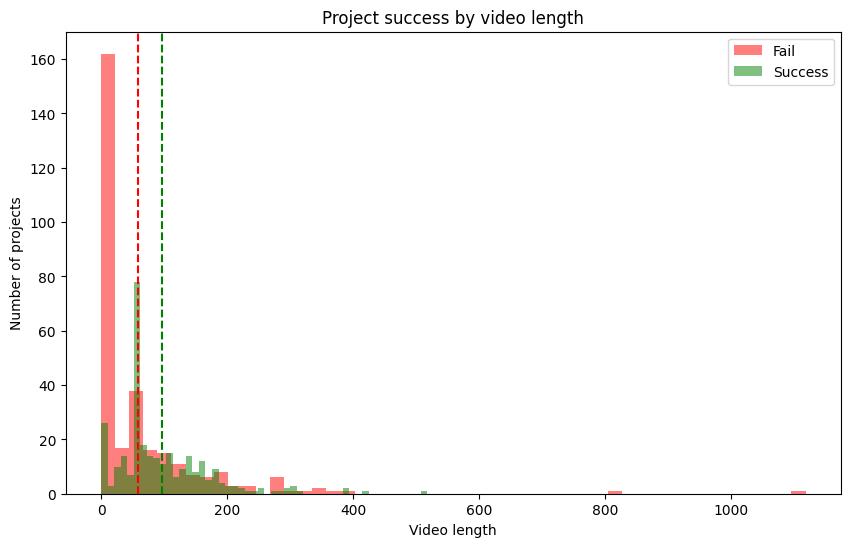

In [10]:
# project success vs video length
plt.figure(figsize=(10, 6))
plt.hist(df[df["success"] == 0]["video_length"], bins=50, alpha=0.5, color="red", label="Fail")
plt.hist(df[df["success"] == 1]["video_length"], bins=50, alpha=0.5, color="green", label="Success")
plt.axvline(df[df["success"] == 0]["video_length"].mean(), color="red", linestyle="--")
plt.axvline(df[df["success"] == 1]["video_length"].mean(), color="green", linestyle="--")
plt.xlabel("Video length")
plt.ylabel("Number of projects")
plt.legend()
plt.title("Project success by video length")
plt.show()

## Insights from EDA
Apparent effort in creating a crowdfunding campaign coorelates with success. Succesful campaigns tend to have videos, a social media prescense, and more detailed descriptions. Failed campaigns tend to have shorter descriptions and often lack videos and social media presence.

# Preprocessing
1. Sample data for target balance. There are 376 successes in the dataset so we'll sample 300 of each target.
1. Normalize numeric values
1. One-hot encode categorical values

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

columns_to_drop = ["percent_collected", "funding_collected","funding_target","project_name","project_owner_name","description"]

df = df.drop(columns=columns_to_drop)

## Onehot and Normalizing

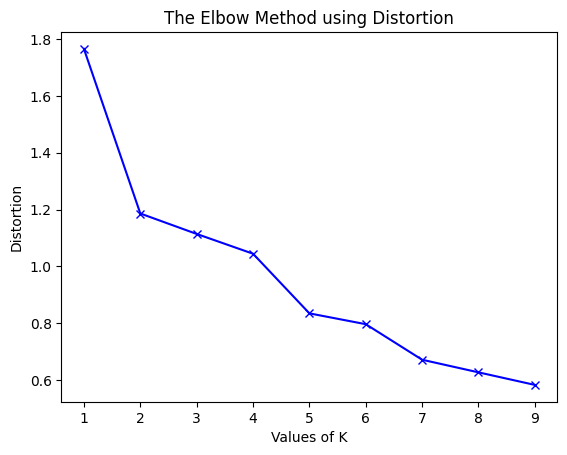

In [12]:

# Separate features and text data
text_features = ["description"]
categorical_features = [
    "platform",
    "crowdfunding_type",
    "project_category",
    "funding_method",
    "project_owner_gender",
    "project_owner_location",
    "project_region",
    "year_launched",
    "has_video",
    "has_website",
    "has_social",
]
numerical_features = [
    "project_owner_n_backed",
    "project_owner_n_subscribed",
    "project_owner_n_owned",
    "project_owner_n_teams",
    "project_duration",
    "video_length",
    "n_images",
    "n_updates",
    "n_comments",
    "n_backers",
    "n_rewards",
    "n_team_members",
    "n_social",
    "n_followers",
    "n_tags",
    "description_wordcount",
    # "funding_target",
    # "funding_collected",
    # "percent_collected",
]

y = df["success"]
df = df.drop(columns=["success"])

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

# Apply transformations
X = preprocessor.fit_transform(df)

from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_pca)
    kmeanModel.fit(X_pca)

    distortions.append(sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / X_pca.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / X_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("The Elbow Method using Distortion")
plt.show()



# 2 or 4 clusters
At two clusters an elbow becomes apparent. This seems obvious given the target variable.
4 clusters also appears to be a reasonable choice and may be more illuminating.

In [13]:
df.head()

,id,platform,crowdfunding_type,project_category,funding_method,project_owner_gender,project_owner_n_backed,project_owner_n_subscribed,project_owner_n_owned,project_owner_n_teams,...,n_comments,n_backers,n_rewards,n_team_members,has_website,has_social,n_social,n_followers,n_tags,description_wordcount
998,999,fongogo,reward,technology,all or nothing,man,0,0,1,0,...,0,0,6,1,no,no,0,0,0,142
1602,1603,arıkovanı,reward,technology,all or nothing,man,0,0,1,0,...,16,9,10,6,no,no,0,0,0,468
1389,1390,crowdfon,reward,culture-art,all or nothing,man,0,0,1,0,...,0,7,4,1,no,no,0,0,0,115
1190,1191,fonbulucu,reward,technology,all or nothing,man,0,0,3,0,...,0,0,5,1,no,no,0,0,0,1228
1429,1430,crowdfon,reward,other,all or nothing,man,0,0,1,0,...,0,0,4,1,no,no,0,0,0,115


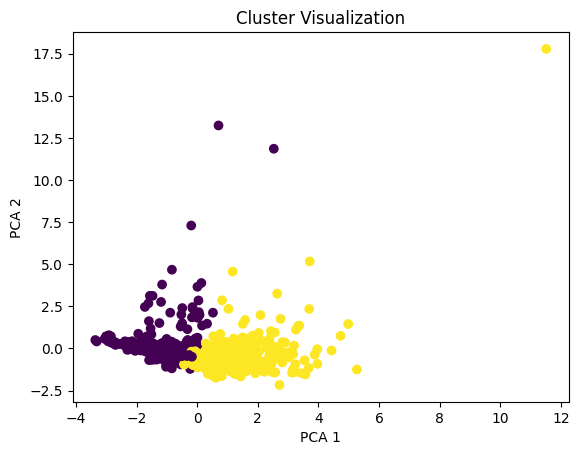

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
df[f"Cluster"] = clusters

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cluster Visualization")
plt.show()

In [15]:
import numpy as np

df["success"] = y

cluster_summary = df.groupby(f"Cluster")

numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = cluster_summary[numeric_columns].mean()
print(df.groupby(f"Cluster")["has_social"].value_counts())
print(df.groupby(f"Cluster")["has_video"].value_counts())


# Show cluster summary
print(cluster_summary.to_string())

Cluster  has_social
0        no            242
         yes            57
1        yes           278
         no             23
Name: count, dtype: int64
Cluster  has_video
0        no           150
         yes          149
1        yes          269
         no            32
Name: count, dtype: int64
                  id  project_owner_n_backed  project_owner_n_subscribed  project_owner_n_owned  project_owner_n_teams  year_launched  project_duration  video_length  n_images  n_updates  n_comments  n_backers  n_rewards  n_team_members  n_social  n_followers    n_tags  description_wordcount  Cluster   success
Cluster                                                                                                                                                                                                                                                                                                                
0        1016.789298                0.127090                         0.0 

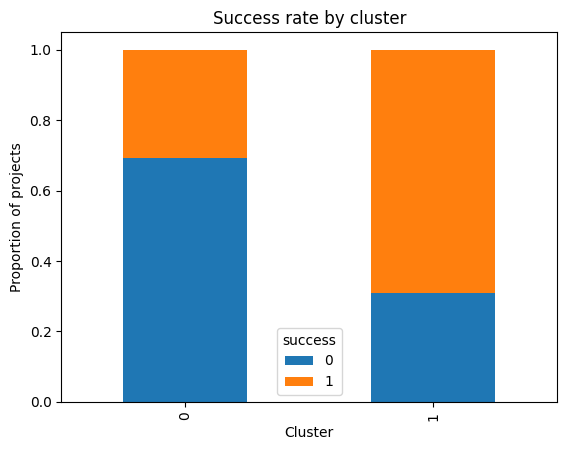

In [16]:
# Plot the distribution of the target variable for each cluster
cluster_summary = df.groupby(f"Cluster")["success"].value_counts(normalize=True).unstack()
cluster_summary.plot(kind="bar", stacked=True)
plt.xlabel(f"Cluster")
plt.ylabel("Proportion of projects")
plt.title("Success rate by cluster")
plt.show()


# Investigate what makes Cluster 1 special
The clustering results don't seem to shed much light on the problem. The same results are repeated as before using simple statistical methods.
I've reproduced the "has video" chart below based on the cluster grouping. As expected, the more succesful cluster appears has a higher proportion of videos. Similar results can be shown for wordcount and social media prescense.

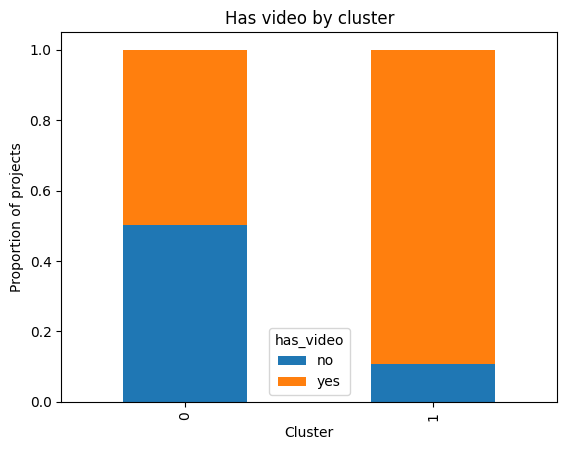

In [17]:
# Plot the distribution of the target variable for each cluster
has_video_summary = df.groupby(f"Cluster")["has_video"].value_counts(normalize=True).unstack()
has_video_summary.plot(kind="bar", stacked=True)
plt.xlabel(f"Cluster")
plt.ylabel("Proportion of projects")
plt.title("Has video by cluster")
plt.show()


# Initial Findings
It's surprising that the elbow method found 2 clusters to be best. The clusters accounted for 30% and 70% success respectively so they aren't perfectly predictive.

# Further Work
The second elbow at 4 clusters would be interesting to reflect on.

An alternate clustering method like dbscan would be interesting too.

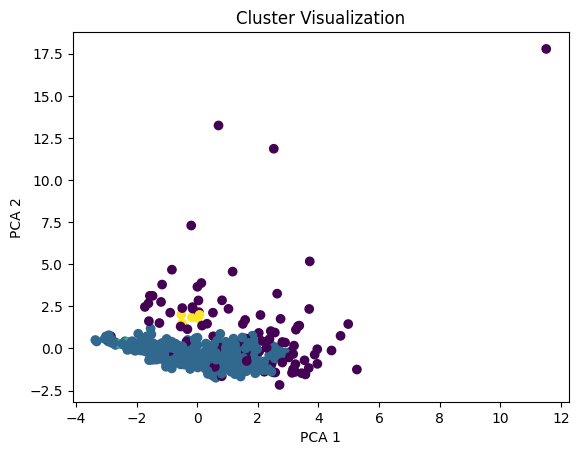

In [18]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

df = df.drop(columns=["Cluster"])
y = df["success"]
df = df.drop(columns=["success"])

X = preprocessor.fit_transform(df)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

clusters = dbscan.fit_predict(X_pca)

df["Cluster"] = clusters

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cluster Visualization")
plt.show()


In [19]:
df["success"] = y

cluster_summary = df.groupby(f"Cluster")

numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = cluster_summary[numeric_columns].mean()
print(df.groupby(f"Cluster")["has_social"].value_counts())
print(df.groupby(f"Cluster")["has_video"].value_counts())


# Show cluster summary
print(cluster_summary.to_string())

Cluster  has_social
-1       yes            70
         no             33
 0       yes           265
         no            215
 1       no             12
 2       no              5
Name: count, dtype: int64
Cluster  has_video
-1       yes           94
         no             9
 0       yes          319
         no           161
 1       no            12
 2       yes            5
Name: count, dtype: int64
                  id  project_owner_n_backed  project_owner_n_subscribed  project_owner_n_owned  project_owner_n_teams  year_launched  project_duration  video_length   n_images  n_updates  n_comments   n_backers  n_rewards  n_team_members  n_social   n_followers    n_tags  description_wordcount  Cluster   success
Cluster                                                                                                                                                                                                                                                                             

# DBSCAN Identifies Outliers
After many iterations, successful crowdfunding attempts are often in the "outliers" cluster. This is the most interesting observation I made. I believe this suggests that the dataset may not provide the needed information to fully predict the success or failure of a crowdfunding campaign.

Exploring the descriptions would be an interesting next step. The descriptions are a mix of Turkish and English text. Without translating all of the descriptions to English, it would be interesting to try applying some NLP techniques to find patterns in successes and failures. I'd be curious to see how the mix of languages would reflect in the ultimate outcome of techniques like NMF.